In [1]:
import pandas as pd

In [ ]:
#m² to sqft → multiply by 10.7639
#sqft to m² → multiply by 0.092903

In [2]:
url = "SquareFeet_Data.csv"
data = pd.read_csv(url)

data["SquareFeet"] = data["SquareFeet"] * 0.092903
data['price'] = data['price'] / 1000

x = data["SquareFeet"]
y = data["price"]

In [3]:
data

,SquareFeet,StateA,StateB,StateC,price
0,78.967550,1,0,0,467.500
1,72.371437,0,1,0,363.014
2,91.973970,1,0,0,594.000
3,61.780495,0,0,1,266.000
4,51.096650,0,0,1,220.000
5,81.754640,0,1,0,478.720
6,52.676001,0,1,0,264.222
7,94.761060,0,1,0,497.760
8,192.030501,0,0,1,756.522
9,53.605031,1,0,0,375.050


In [4]:
w = 10
b = 10
n = len(x)

w_gradient = (2 * x * (w*x + b - y)).mean()
b_gradient = (2 * (w*x + b - y)).mean()
b_gradient

np.float64(915.8337599999999)

In [5]:
def compute_gradient(x,y,w,b):
    # w_gradient = 2*x*(w*x+b - y)
    # b_gradient = 2*(w*x+b - y)
    
    # w_gradient = (2*x*(w*x+b - y)).sum() / n
    # b_gradient = (2*(w*x+b - y)).sum() / n
    
    w_gradient = (2 * x * (w*x + b - y)).mean()
    b_gradient = (2 * (w*x + b - y)).mean()
    return w_gradient,b_gradient

In [6]:
compute_gradient(x,y,20,10)

(np.float64(276380.7448477438), np.float64(2653.8518230303034))

In [7]:
def compute_cost(x,y,w,b):
    y_pred = w*x + b
    cost = (y - y_pred)**2
    cost = cost.sum()/len(x)

    return cost

In [45]:
# w = 0
# b = 0
# learning_rate = 0.0000001
# for i in range(5000):
#     w_gradient,b_gradient = compute_gradient(x,y,w,b)

#     w = w - w_gradient * learning_rate
#     b = b - b_gradient * learning_rate
#     cost = compute_cost(x,y,w,b)
#     if i % 500 == 0:
#         print(f"Ieration {i:5}: Cost {cost:.2f}, w: {w:.2f}, b: {b:.2f}, w_gradient: {w_gradient:.2f}, b_gradient: {b_gradient:.2f}")

In [11]:
w = 0
b = 0
learning_rate = 0.0000001

def gradient_descent(x,y,w_init,b_init,learning_rate,cost_function,gradient_function,run_ieration,p_ieration = 500):
    c_hist = []
    w_hist = []
    b_hist = []

    w = w_init
    b = b_init

    for i in range(run_ieration):
        w_gradient, b_gradient = gradient_function(x,y,w,b)

        w = w - w_gradient * learning_rate
        b = b - b_gradient * learning_rate
        cost = compute_cost(x,y,w,b)

        c_hist.append(cost)
        w_hist.append(w)
        b_hist.append(b)

        if i%p_ieration == 0:
            print(f"Ieration {i}:Cost {cost}, w: {w}, b: {b}, w_gradient: {w_gradient}, b_gradeint: {b_gradient}")

    return w,b,c_hist,w_hist,b_hist

In [12]:
w_init = 0
b_init = 0
learning_rate = 0.0000001
run_ieration = 5000

w_final,b_final,c_hist,w_hist,b_hist = gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_ieration)

Ieration 0:Cost 217250.22210812083, w: 0.008573064816410297, b: 8.421843030303031e-05, w_gradient: -85730.64816410298, b_gradeint: -842.1843030303031
Ieration 500:Cost 47504.24490374939, w: 2.830220364785714, b: 0.028063401874277593, w_gradient: -34791.66350239823, b_gradeint: -350.83552015438056
Ieration 1000:Cost 19547.92534215252, w: 3.9753146518471283, b: 0.03987083587353943, w_gradient: -14119.28436505536, b_gradeint: -151.43312024388234
Ieration 1500:Cost 14943.650226408861, w: 4.440019650515202, b: 0.04511534147613646, w_gradient: -5729.889444968543, b_gradeint: -70.51023768245204
Ieration 2000:Cost 14185.339540681342, w: 4.628604788894984, b: 0.04769643087507614, w_gradient: -2325.2524343846135, b_gradeint: -37.669458036960606
Ieration 2500:Cost 14060.439879730118, w: 4.7051332289732875, b: 0.04919662863482411, w_gradient: -943.5612305239397, b_gradeint: -24.341659814020804
Ieration 3000:Cost 14039.85983343399, w: 4.73618611503119, b: 0.050258164827619224, w_gradient: -382.8346

In [13]:
import matplotlib.pyplot as plt
import numpy as np

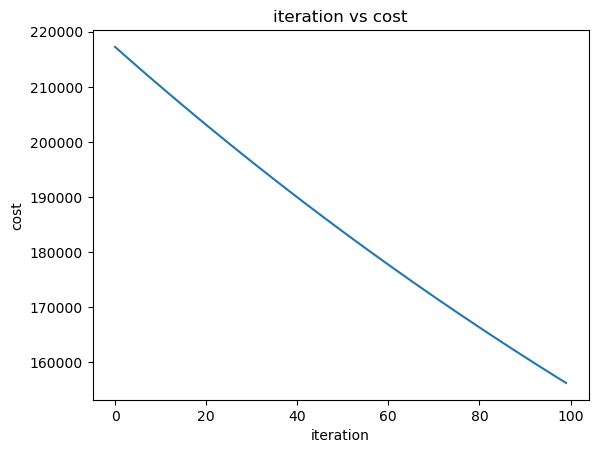

In [20]:
plt.plot(np.arange(0,100),c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [21]:
print(f"final w b = ({w_final:.2f} {b_final:.2f})")

final w b = (4.76 0.05)


In [29]:
sqft = 733

print(f"if square feet is {sqft} (sqft), {sqft * 0.092903} (m^2), predict price is: {w_final*(sqft * 0.092903) + b_final:.1f}K")

if square feet is 733 (sqft), 68.097899 (m^2), predict price is: 324.0K


In [30]:
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i = 0
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j] = cost
        j = j + 1
    i = i + 1

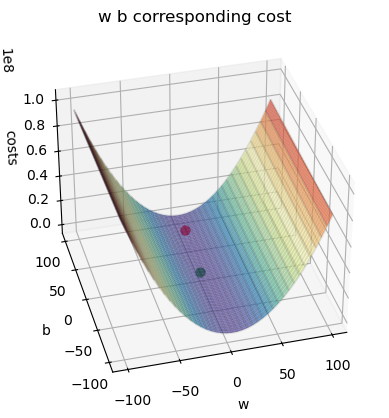

when w=[4],b=[73] will appear min cost:[13811.0357929]


In [44]:
ax = plt.axes(projection="3d")
# ax.xaxis.set_pane_color((0,0,0))
# ax.yaxis.set_pane_color((0,0,0))
# ax.zaxis.set_pane_color((0,0,0))
ax.view_init(35,-105)
b_grid, w_grid = np.meshgrid(bs,ws)
ax.plot_surface(w_grid,b_grid,costs,cmap="Spectral_r",alpha=0.7)
ax.plot_wireframe(w_grid,b_grid,costs,color="black",alpha=0.1)

ax.set_title("w b corresponding cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red",s=40)
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color="green",s=40)
ax.plot(w_hist,b_hist,c_hist)

plt.show()
print(f"when w={ws[w_index]},b={bs[b_index]} will appear min cost:{costs[w_index,b_index]}")